<a href="https://colab.research.google.com/github/juansebastiangit/Inteligencia_artificial/blob/main/Proyecto/Adsorcion%20en%20superficies%20basado%20en%20RIUS%20V%201.1%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera versión del intento de simulación de adsorción basado en el algoritmo de RIUS para pegar iones a superficies



# Hamiltoniano del sistema basico basado en el potencial de lennard-jones

$$ \textit{H}\left ( r_{ij} \right ) = 4\epsilon \left [ \left ( \frac{\sigma }{r_{ij}} \right )^{12}-\left ( \frac{\sigma }{r_{ij}} \right )^{6} \right] $$



# Librerias y Constantes

In [1]:
#Importamos ls librerias necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
#Definimos las constantes a utilizar
a = 7.9 #Parametro de red (A)
SigmaAl = 3.302 #Radio de vanderwalls del aluminio (A)
EpsilonAl = 7.700e-3 #Fondo del pozo del aluminio (j/mol)
SigmaHg = 2.79 #Radio de vanderwalls del mercurio (A)
EpsilonHg = 10031 #Fondo del pozo mercurio (j/mol)
Sigma = np.sqrt(SigmaAl*SigmaHg)
Epsilon = np.sqrt(EpsilonAl*EpsilonHg)

In [19]:
for i in range(0,1):
  print (i)

0


# Creación de la muestra

[[3.95 3.95 0.  ]
 [3.95 0.   3.95]
 [0.   3.95 3.95]
 [0.   0.   0.  ]
 [0.   0.   7.9 ]
 [0.   7.9  0.  ]
 [0.   7.9  7.9 ]
 [7.9  0.   0.  ]
 [7.9  0.   7.9 ]
 [7.9  7.9  0.  ]
 [7.9  7.9  7.9 ]]
11


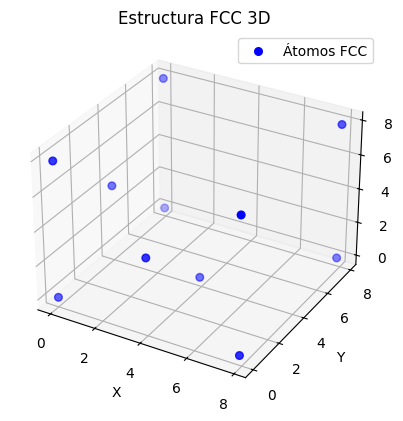

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones de la red FCC
celdas_largo = 2
celdas_alto = 2
celdas_profundidad = 2
a = 7.9  # Longitud de la celda unitaria

# Definir los vectores base de una celda unitaria FCC
base_fcc = np.array([[0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5]]) * a

# Crear las posiciones para las celdas unitarias
posiciones = list(base_fcc)
for i in range(celdas_largo):
    for j in range(celdas_alto):
        for k in range(celdas_profundidad):
          # Posiciones de átomos en cada celda FCC
          posiciones.append([i*a, j*a, k*a])

# Agregar átomos adicionales en la última fila y columna
# Última columna
"""for j in range(celdas_alto):
  for k in range(celdas_profundidad):
    x.append(celdas_largo * a)
    y.append(j * a + 0)  # Átomo en el vértice
    z.append(k * a + 0)
    x.append(celdas_largo * a)
    y.append(j * a + 0.5 * a)  # Átomo en el centro de la cara
    z.append(k * a + 0.5 * a)

# Última fila
for i in range(celdas_largo):
    for k in range(celdas_profundidad):
        x.append(i * a + 0)
        y.append(celdas_alto * a)
        z.append(k * a + 0)
        x.append(i * a + 0.5 * a)
        y.append(celdas_alto * a)
        z.append(k * a + 0.5 * a)

# Cara lateral (z = celdas_profundidad * a)
for i in range(celdas_largo):
    for j in range(celdas_alto):
        x.append(i * a + 0)
        y.append(j * a + 0)
        z.append(celdas_profundidad * a)
        x.append(i * a + 0.5 * a)
        y.append(j * a + 0.5 * a)
        z.append(celdas_profundidad * a)

# Añadir el átomo del vértice superior frontal derecho
x.append(celdas_largo * a)
y.append(celdas_alto * a)
z.append(celdas_profundidad * a)

#Añadir las otras esquinas faltantes
x.extend([0, celdas_largo * a, celdas_largo * a])
y.extend([celdas_alto * a, celdas_alto * a, 0])
z.extend([celdas_profundidad * a, 0, celdas_profundidad * a])"""

fcc_positions = np.array(posiciones)  # Matriz con posiciones FCC
num_atoms =fcc_positions.shape[0]
# Imprimir las posiciones
print (fcc_positions)
print(num_atoms)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the FCC atoms
ax.scatter(fcc_positions[:, 0], fcc_positions[:, 1], fcc_positions[:, 2], s=30, color='blue', label="Átomos FCC")

# Customize the plot (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Estructura FCC 3D')
ax.legend()

# Show the plot
plt.show()

# Creación de los iones que se van a adsorber

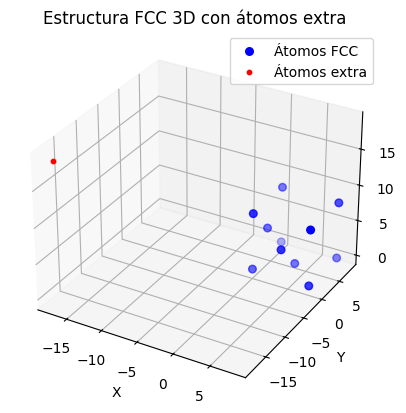

In [41]:
num_iones = 1  # Número de átomos extra que se colocarán al azar

# Generar átomos adicionales en posiciones aleatorias por fuera de la superficie de la muestra
if np.random.rand() < 0.5:
    x_extra = np.random.uniform(-(celdas_largo*a + 2*Sigma), -(celdas_largo * a + 0.3*Sigma), num_iones)
else:
    x_extra = np.random.uniform(celdas_largo*a + 2*Sigma, celdas_largo * a + 0.3*Sigma, num_iones)

if np.random.rand() < 0.5:
    y_extra = np.random.uniform(-(celdas_largo*a + 2*Sigma), -(celdas_largo * a + 0.3*Sigma), num_iones)
else:
    y_extra = np.random.uniform(celdas_largo*a + 2*Sigma, celdas_largo * a + 0.3*Sigma, num_iones)
if np.random.rand() < 0.5:
    z_extra = np.random.uniform(-(celdas_largo*a + 2*Sigma), -(celdas_largo * a + 0.3*Sigma), num_iones)
else:
    z_extra = np.random.uniform(celdas_largo*a + 2*Sigma, celdas_largo * a + 0.3*Sigma, num_iones)


extra_positions = np.column_stack((x_extra, y_extra, z_extra))  # Matriz con posiciones de átomos extra

# Graficar las posiciones en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    fcc_positions[:, 0],
    fcc_positions[:, 1],
    fcc_positions[:, 2],
    color="blue",
    s=30,
    label="Átomos FCC",
)
ax.scatter(
    extra_positions[:, 0],
    extra_positions[:, 1],
    extra_positions[:, 2],
    color="red",
    s=10,
    label="Átomos extra",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Estructura FCC 3D con átomos extra")
ax.legend()
plt.show()

In [30]:
@tf.function
# Potencial de Lennard-Jones
def lennard_jones_potential(r, epsilon=Epsilon, sigma=Sigma):
    """
    Calcula el potencial de Lennard-Jones para una distancia r.
    """
    sigma = tf.cast(sigma, tf.float32)
    epsilon = tf.cast(epsilon, tf.float32)
    lj_term = (sigma / r)**12 - (sigma / r)**6
    return 4 * epsilon * lj_term + epsilon #Suma epsilon para desplazar el fondo del potencial a 0

# Función de costo para el modelo
def H_loss(Xh, Xt, epsilon=Epsilon, sigma=Sigma,lam_=1.0):
    """
    Calcula la energía total de las interacciones entre los iones (Xh) y la superficie (Xt),
    utilizando el potencial de Lennard-Jones.

    Parameters:
        Xh: tensor con posiciones de los iones (num_iones, 2)
        Xt: tensor con posiciones de los átomos de la superficie (num_superficie, 2)

    Returns:
        Energía promedio del sistema (escalar)
    """
    # Expandir dimensiones para obtener todas las combinaciones de distancias
    diff = tf.expand_dims(Xh, axis=1) - tf.expand_dims(Xt, axis=0)  # (num_iones, num_superficie, 2)
    r = tf.norm(diff, axis=-1)  # Distancia entre cada ion y cada átomo de la superficie (num_iones, num_superficie)

    # Evitar divisiones por cero
    r = tf.where(r == 0, 1e-10, r)

    # Calcular el potencial de Lennard-Jones para cada interacción
    lj_energy = lennard_jones_potential(r, epsilon, sigma)  # (num_iones, num_superficie)
    #reg_term = tf.reduce_sum(lj_energy/4*epsilon,axis=1)
    # Energía total para cada ion
    E_total = tf.reduce_sum(lj_energy, axis=1)  # Suma sobre los átomos de la superficie (num_iones)
    #print(E_total.shape)
    # Devolver la energía promedio del sistema
    energy_total = tf.reduce_mean(lam_*E_total)#+(1-lam_)*reg_term)  # Promedio sobre los iones (escalar)
    #print(energy_total.shape)
    return energy_total

In [42]:
#tensorflow data
ion = tf.Variable(extra_positions,dtype=tf.float32)
sample_atoms = tf.convert_to_tensor(fcc_positions,dtype=tf.float32)
#lam_LJ = 0.4
#lam_ = tf.constant(lam_LJ,dtype=tf.float32)


In [38]:
def exp_decay_lr(initial_lr, decay_rate, epoch):
    return initial_lr * decay_rate ** epoch

In [45]:
# Callback class
class EarlyStoppingCallback:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.wait = 0
        self.best_loss = float('inf')
        self.stopped_epoch = 0

    def on_epoch_end(self, epoch, loss):
        if loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                return True  # Signal to stop training
        return False  # Continue training

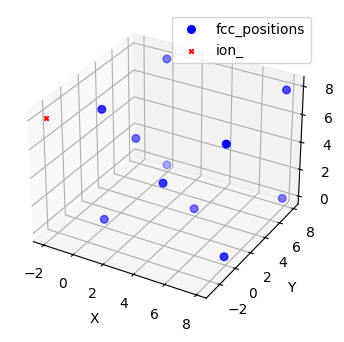

Epoch 1/100
Loss: 87.77361297607422 MeanGrad: [-2.3942597  -3.3854647   0.34301934]


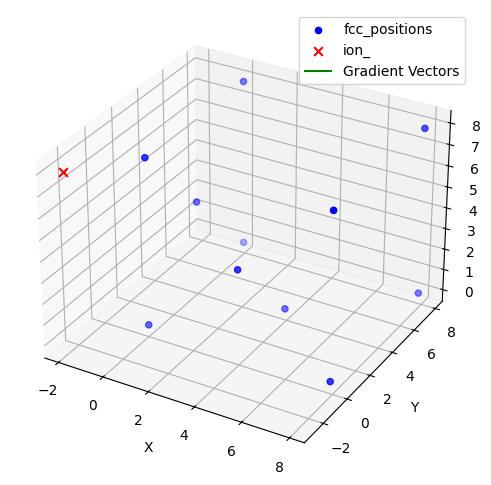

Epoch 2/100
Loss: 87.57699584960938 MeanGrad: [1.4452609  2.1625092  0.06550812]


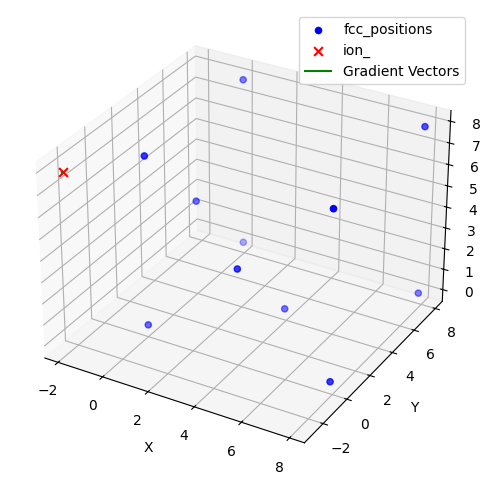

Epoch 3/100
Loss: 87.65574645996094 MeanGrad: [2.5390701 3.7747672 0.1312737]


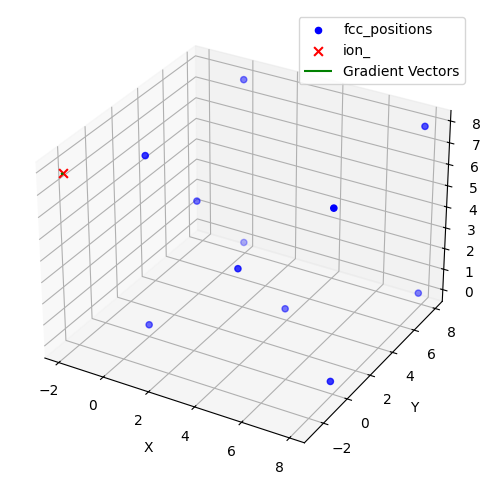

Epoch 4/100
Loss: 87.51344299316406 MeanGrad: [0.6083183  0.946737   0.17532222]


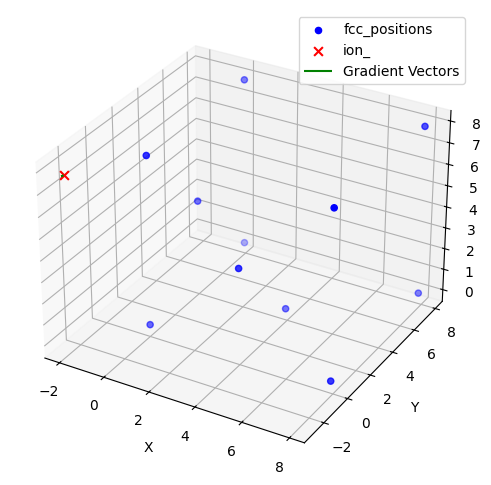

Epoch 5/100
Loss: 87.52151489257812 MeanGrad: [-1.0172358  -1.4135271   0.08028401]


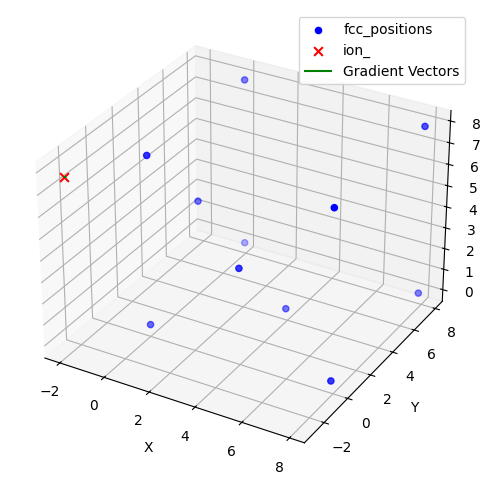

Epoch 6/100
Loss: 87.57192993164062 MeanGrad: [-1.6563612 -2.3352826 -0.0277469]


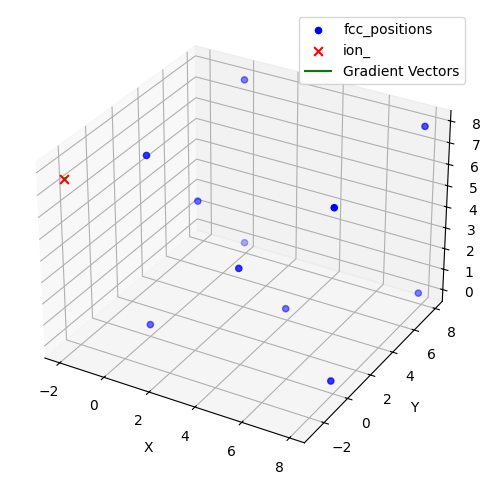

Epoch 7/100
Loss: 87.54847717285156 MeanGrad: [-1.562929   -2.2024982  -0.05920193]


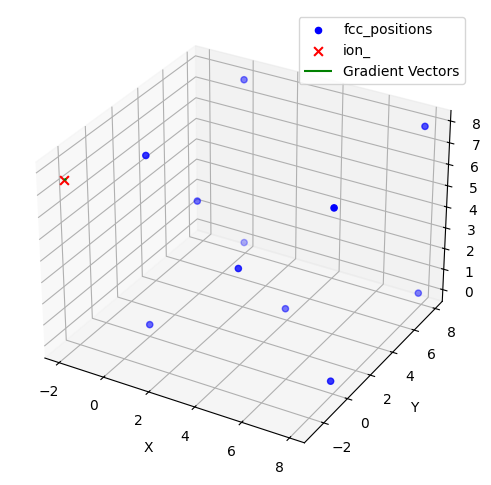

Epoch 8/100
Loss: 87.48133850097656 MeanGrad: [-0.9272296  -1.2829089   0.02388062]


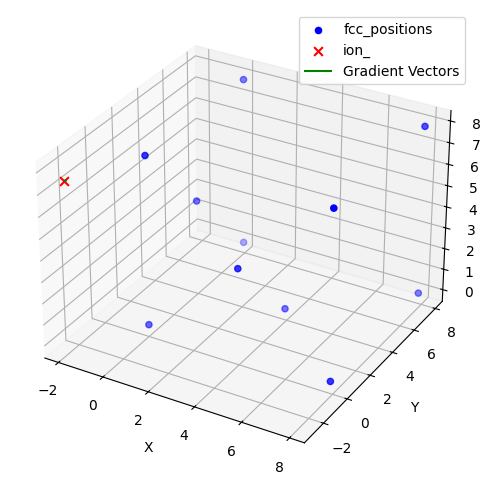

Epoch 9/100
Loss: 87.44664001464844 MeanGrad: [0.08762646 0.20206578 0.2224151 ]


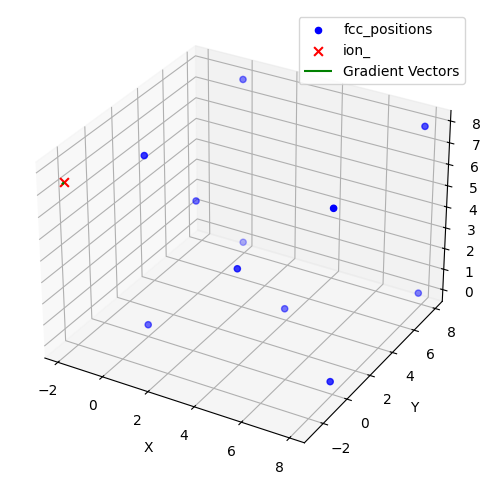

Epoch 10/100
Loss: 87.46125030517578 MeanGrad: [0.99822295 1.5509235  0.4615526 ]


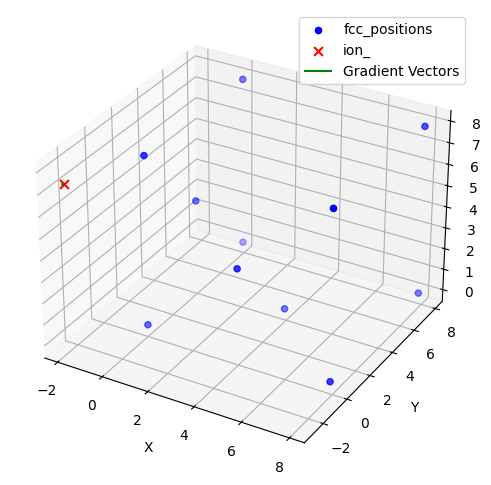

Epoch 11/100
Loss: 87.45449829101562 MeanGrad: [1.1554911 1.7933642 0.5622635]


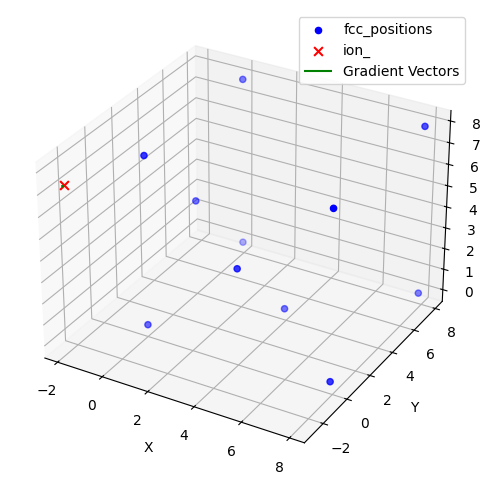

Epoch 12/100
Loss: 87.40913391113281 MeanGrad: [0.5372027  0.88301516 0.4266334 ]


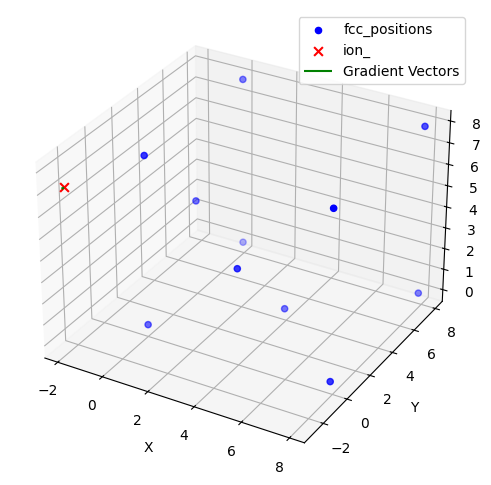

Epoch 13/100
Loss: 87.38141632080078 MeanGrad: [-0.32687795 -0.39447936  0.14717153]


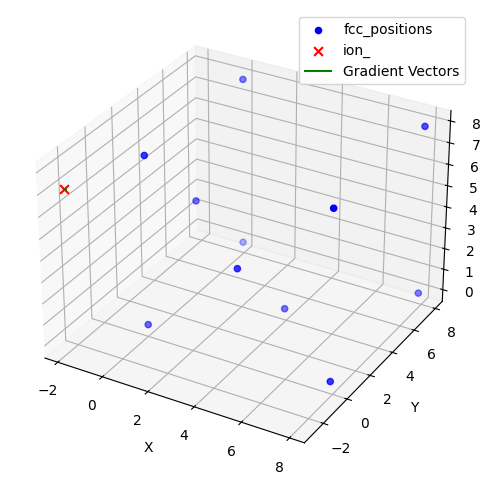

Epoch 14/100
Loss: 87.38597106933594 MeanGrad: [-0.9664016 -1.3407376 -0.1149731]


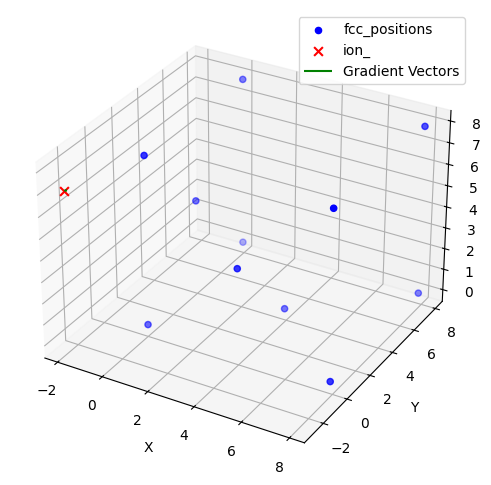

Epoch 15/100
Loss: 87.38397979736328 MeanGrad: [-1.1884006  -1.6707985  -0.23520085]


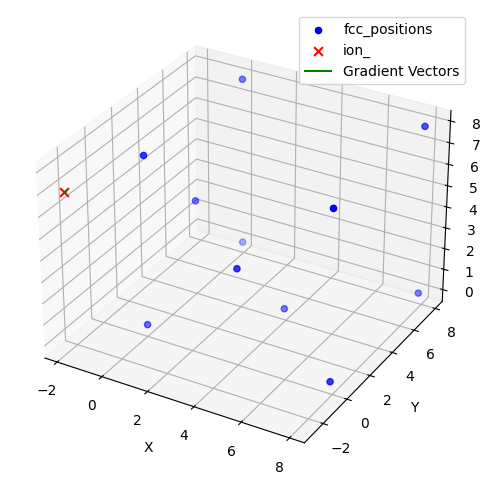

Epoch 16/100
Loss: 87.35260009765625 MeanGrad: [-0.9873121  -1.3728057  -0.15690877]


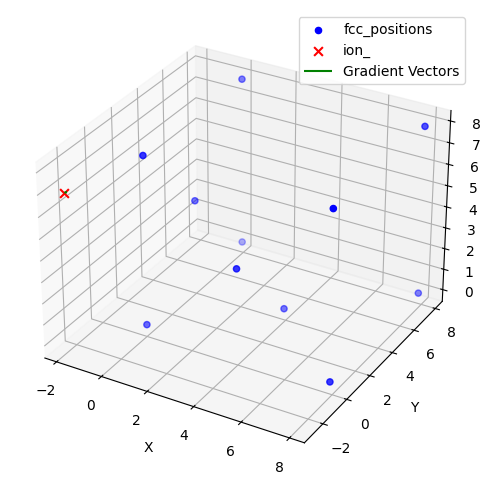

Epoch 17/100
Loss: 87.31436157226562 MeanGrad: [-0.4505445  -0.56758165  0.11009742]


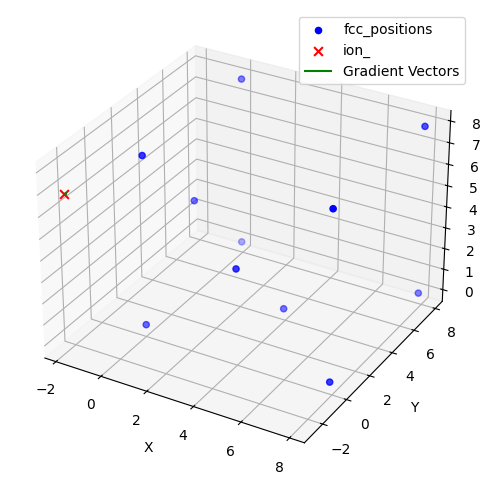

Epoch 18/100
Loss: 87.29762268066406 MeanGrad: [0.18736012 0.4015222  0.46380275]


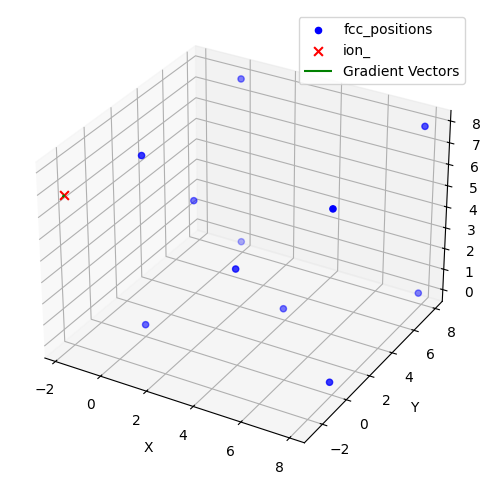

Epoch 19/100
Loss: 87.28775024414062 MeanGrad: [0.53070307 0.93435955 0.69430375]


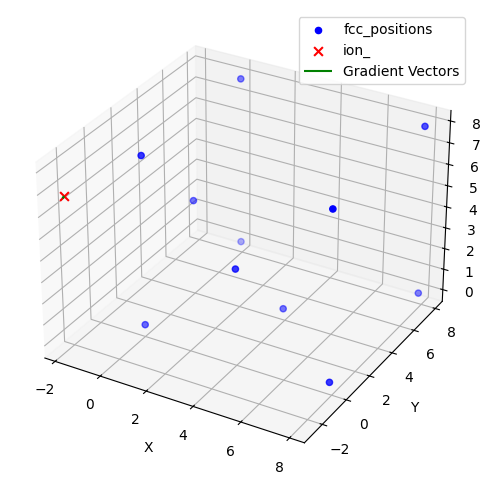

Epoch 20/100
Loss: 87.25834655761719 MeanGrad: [0.36444968 0.69163376 0.6416479 ]


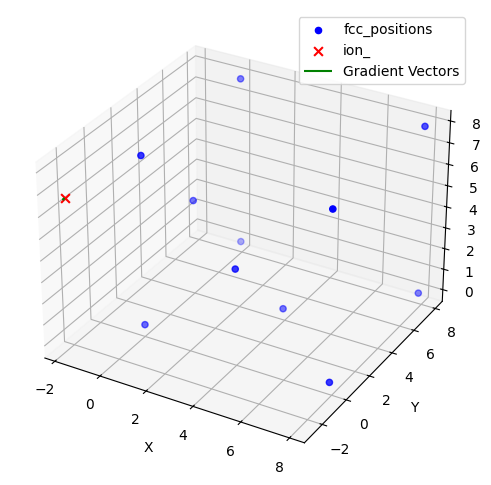

Epoch 21/100
Loss: 87.2226333618164 MeanGrad: [-0.14382774 -0.07992078  0.34893867]


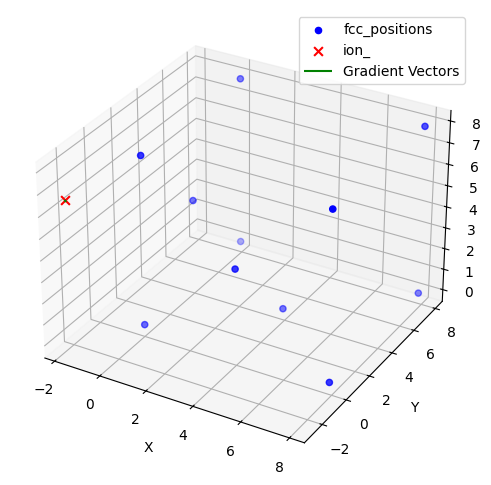

Epoch 22/100
Loss: 87.20144653320312 MeanGrad: [-0.6597412  -0.8695201   0.00373535]


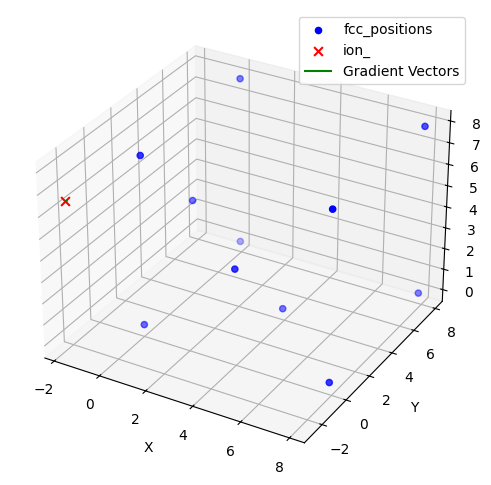

Epoch 23/100
Loss: 87.1843032836914 MeanGrad: [-0.93413186 -1.2917358  -0.2032326 ]


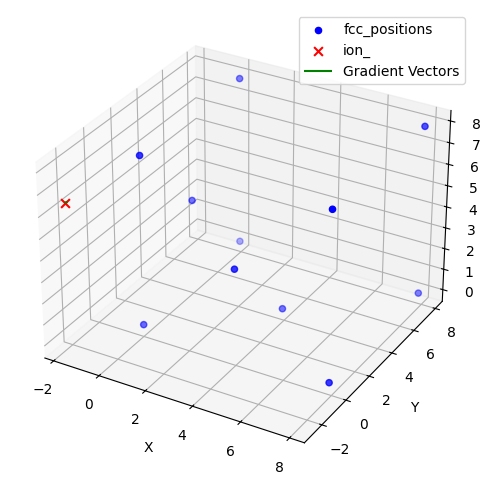

Epoch 24/100
Loss: 87.15119934082031 MeanGrad: [-0.8825495  -1.2097858  -0.16475497]


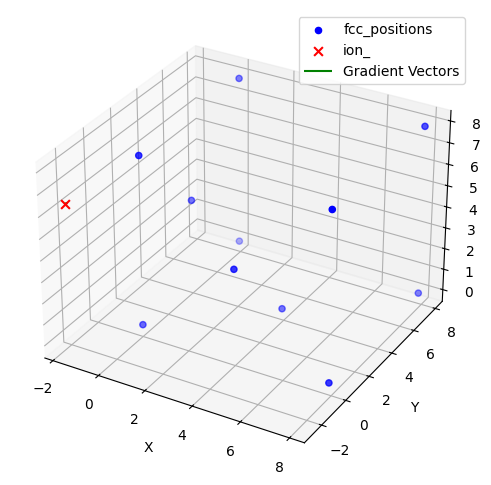

Epoch 25/100
Loss: 87.10786437988281 MeanGrad: [-0.5602779  -0.6992299   0.11559381]


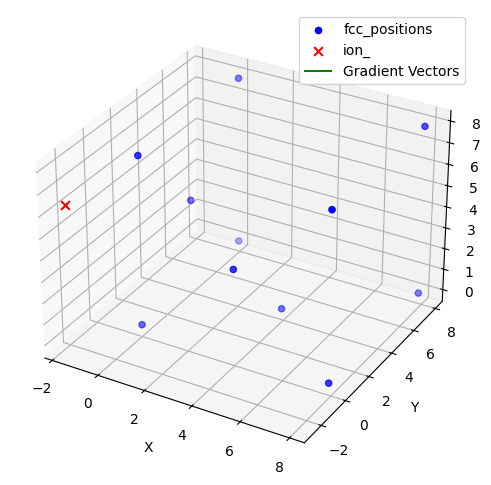

Epoch 26/100
Loss: 87.07174682617188 MeanGrad: [-0.15913351 -0.05235836  0.50012225]


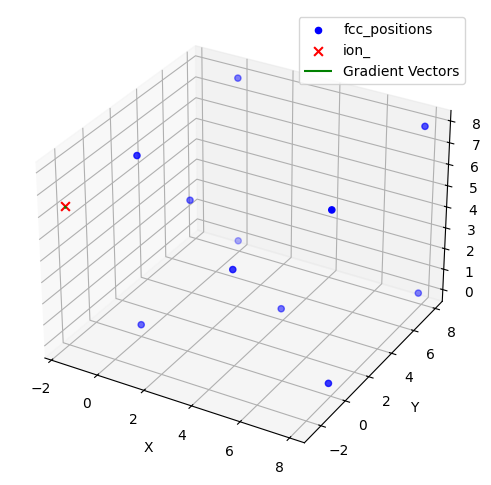

Epoch 27/100
Loss: 87.03717041015625 MeanGrad: [0.03800102 0.2804949  0.7363685 ]


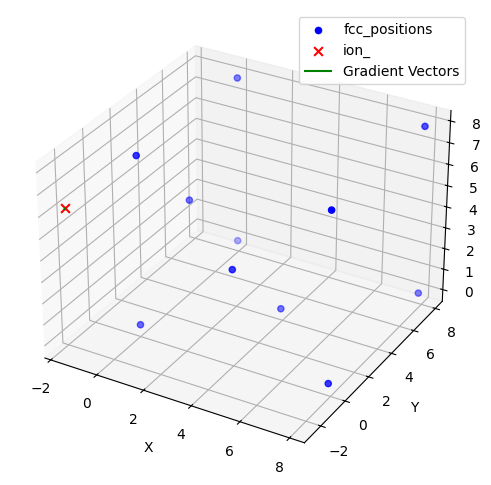

Epoch 28/100
Loss: 86.99050903320312 MeanGrad: [-0.10199143  0.07334062  0.6609118 ]


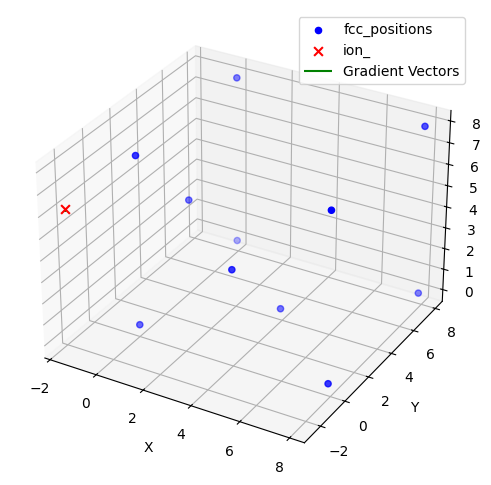

Epoch 29/100
Loss: 86.93904113769531 MeanGrad: [-0.45525333 -0.4862419   0.34412733]


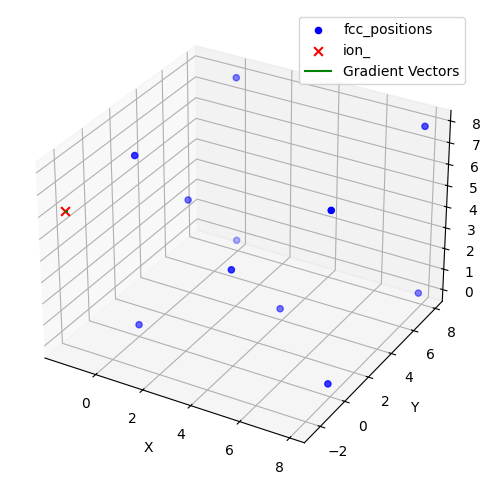

Epoch 30/100
Loss: 86.89146423339844 MeanGrad: [-0.7901392  -1.0247471   0.00733306]


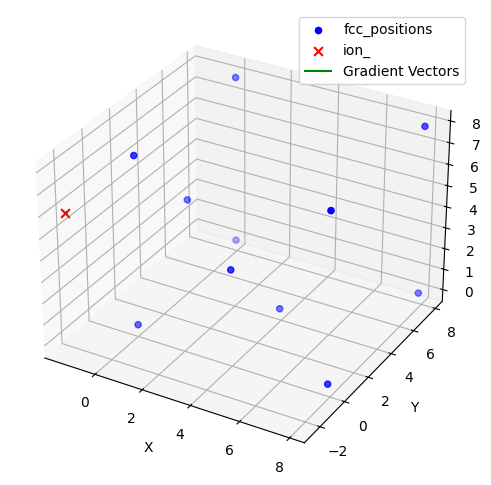

Epoch 31/100
Loss: 86.83795166015625 MeanGrad: [-0.9344258  -1.2535365  -0.13369532]


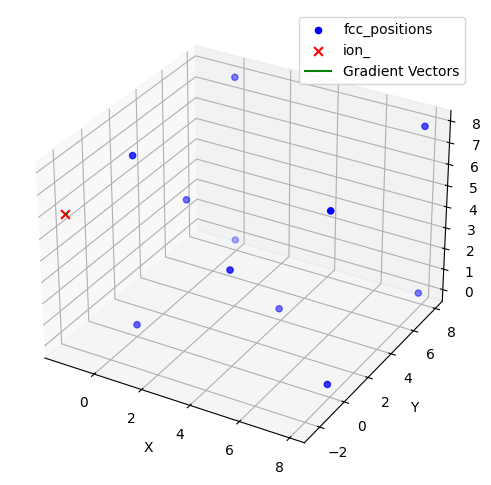

Epoch 32/100
Loss: 86.76897430419922 MeanGrad: [-0.8507862  -1.0976219   0.01464265]


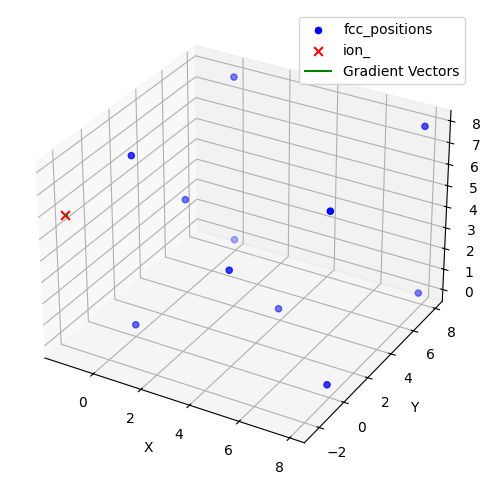

Epoch 33/100
Loss: 86.69186401367188 MeanGrad: [-0.6384397  -0.70979     0.37033585]


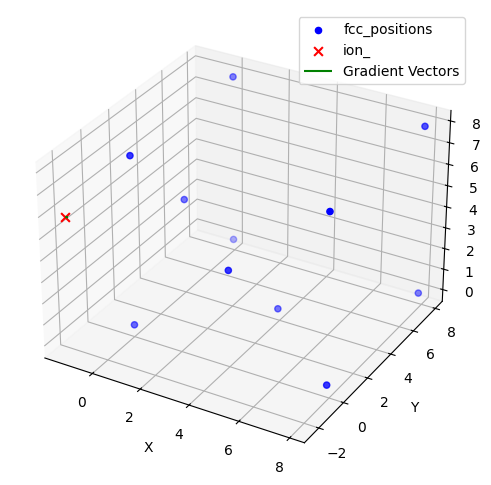

Epoch 34/100
Loss: 86.61067199707031 MeanGrad: [-0.4908336  -0.41650057  0.6865597 ]


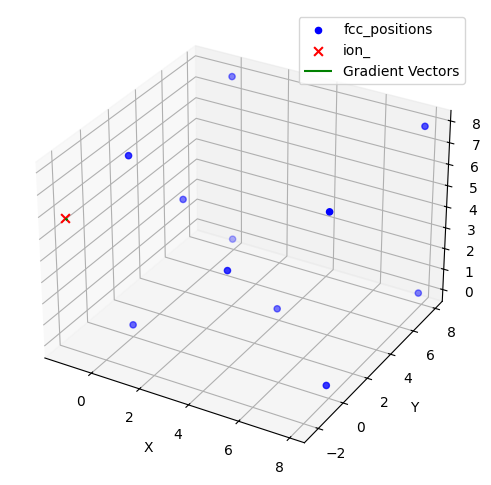

Epoch 35/100
Loss: 86.51659393310547 MeanGrad: [-0.5488109  -0.47446012  0.7303752 ]


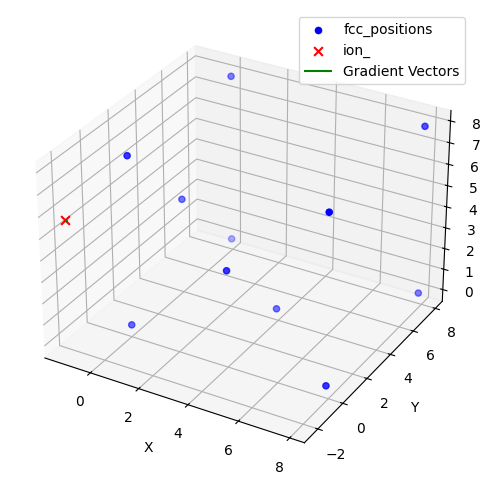

Epoch 36/100
Loss: 86.40766906738281 MeanGrad: [-0.7808362  -0.8461227   0.49261382]


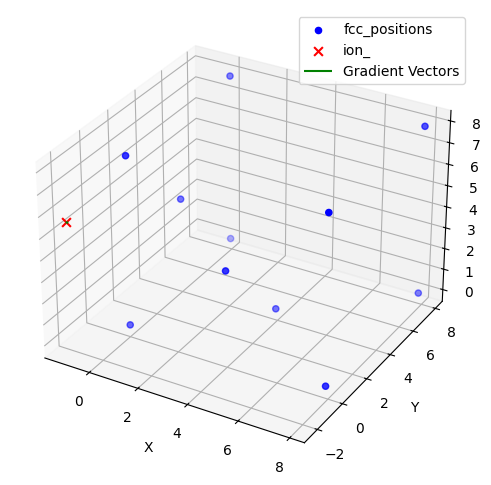

Epoch 37/100
Loss: 86.28742980957031 MeanGrad: [-1.0490257  -1.2922281   0.16399054]


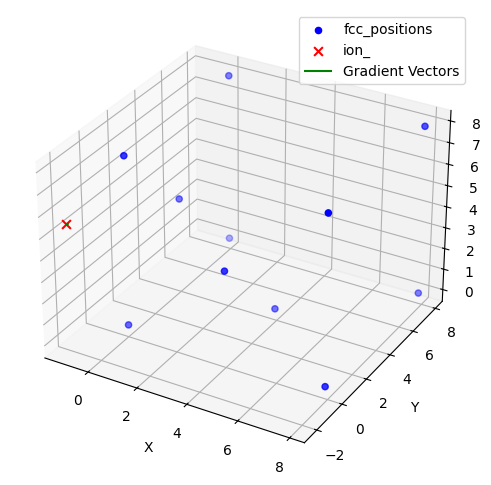

Epoch 38/100
Loss: 86.1495361328125 MeanGrad: [-1.2274472  -1.5740523  -0.01596135]


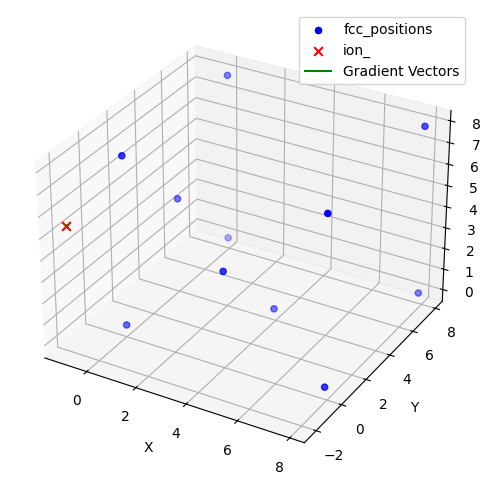

Epoch 39/100
Loss: 85.98332977294922 MeanGrad: [-1.2805365  -1.6036488   0.08158002]


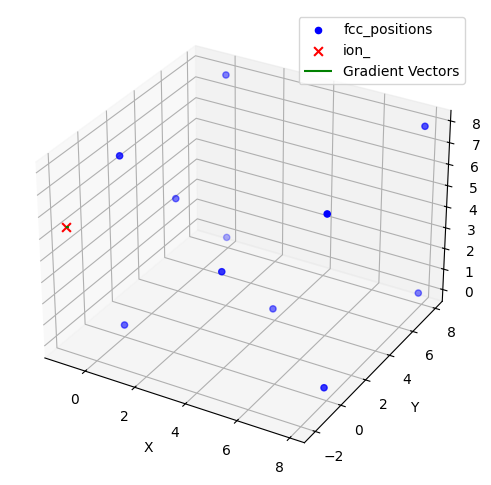

Epoch 40/100
Loss: 85.78684997558594 MeanGrad: [-1.2764647  -1.4897368   0.38100183]


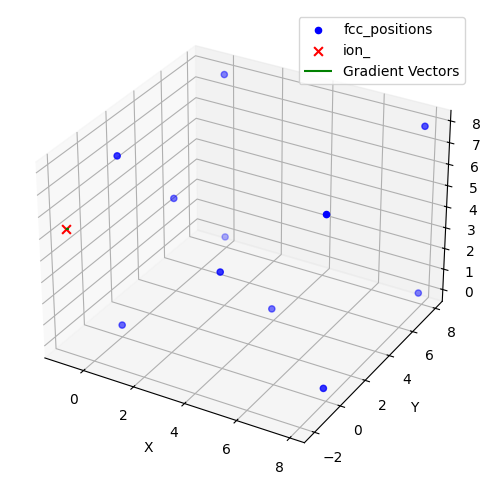

Epoch 41/100
Loss: 85.55723571777344 MeanGrad: [-1.333508  -1.4604818  0.6400604]


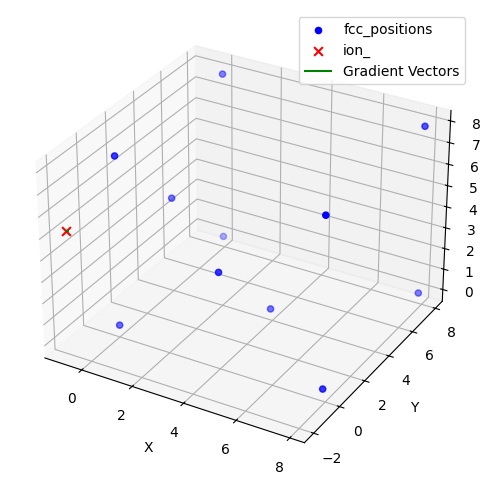

Epoch 42/100
Loss: 85.28341674804688 MeanGrad: [-1.5201232  -1.6713506   0.65274704]


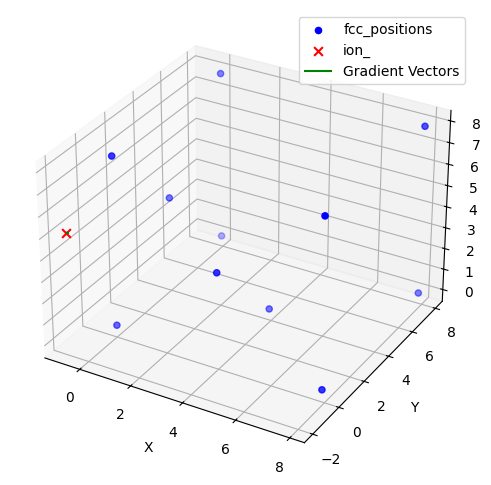

Epoch 43/100
Loss: 84.9553451538086 MeanGrad: [-1.8117635 -2.088419   0.4236829]


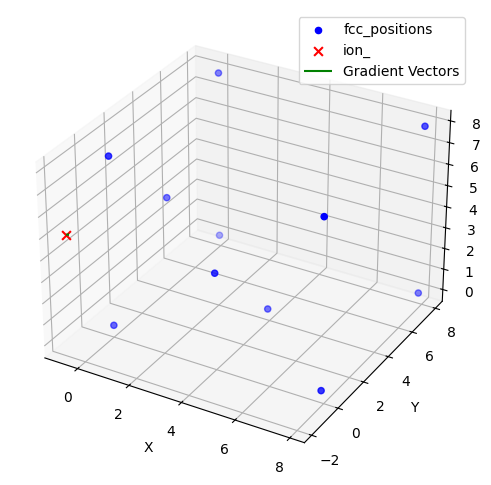

Epoch 44/100
Loss: 84.56239318847656 MeanGrad: [-2.1436503 -2.5640674  0.1313057]


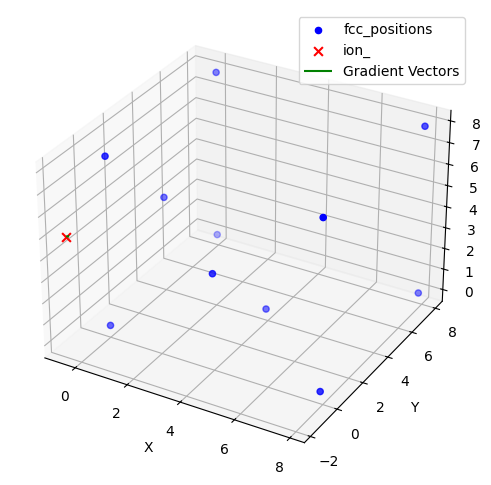

Epoch 45/100
Loss: 84.08551788330078 MeanGrad: [-2.4760227  -2.967582   -0.01888951]


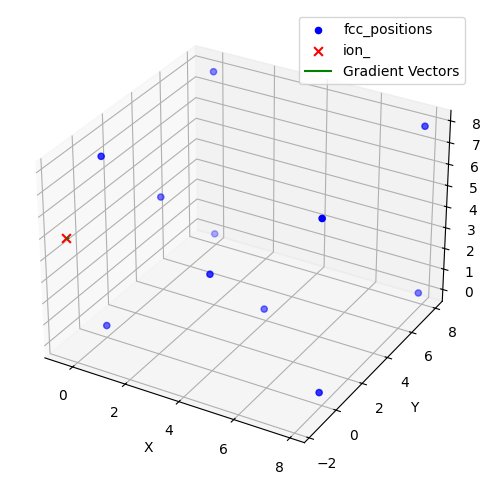

Epoch 46/100
Loss: 83.5009765625 MeanGrad: [-2.826409   -3.279624    0.04685007]


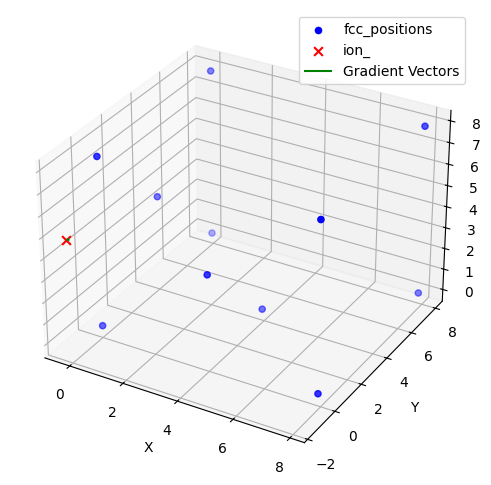

Epoch 47/100
Loss: 82.78592681884766 MeanGrad: [-3.2515078 -3.5899575  0.2179156]


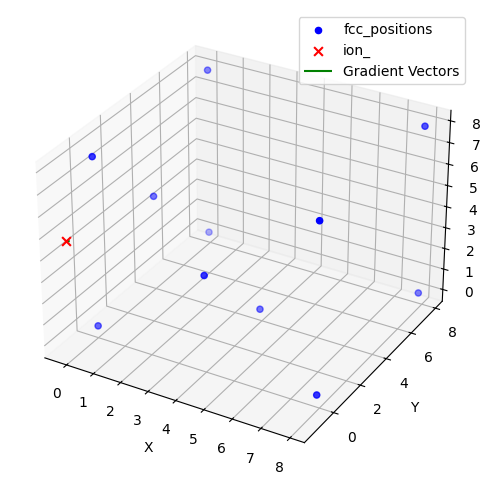

Epoch 48/100
Loss: 81.91325378417969 MeanGrad: [-3.7988055 -4.005837   0.3015466]


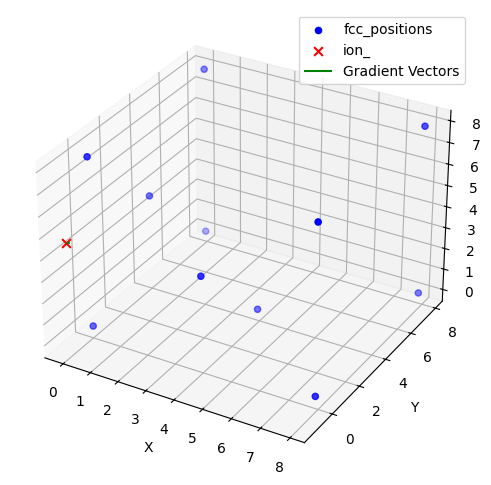

Epoch 49/100
Loss: 80.85196685791016 MeanGrad: [-4.469473   -4.5492578   0.19827013]


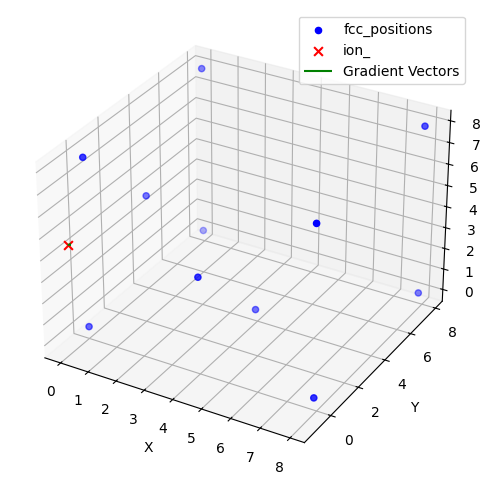

Epoch 50/100
Loss: 79.5772933959961 MeanGrad: [-5.2059703  -5.134659   -0.02289066]


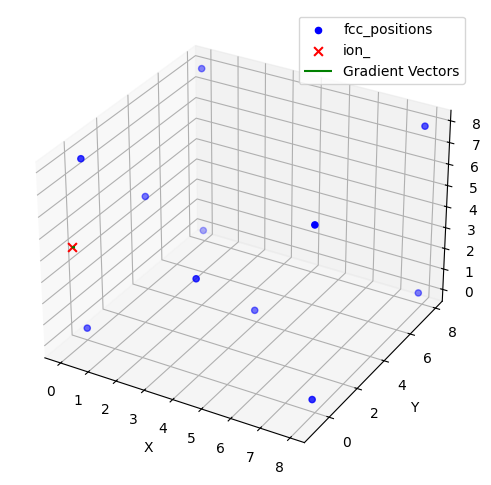

Epoch 51/100
Loss: 78.08399963378906 MeanGrad: [-5.8480144  -5.6252985  -0.23507795]


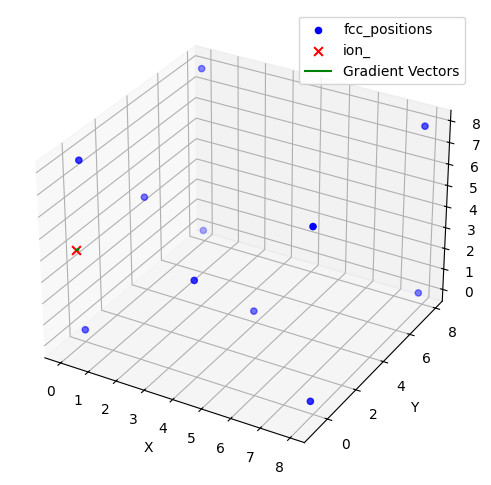

Epoch 52/100
Loss: 76.42363739013672 MeanGrad: [-5.9541435 -5.864236  -0.4146416]


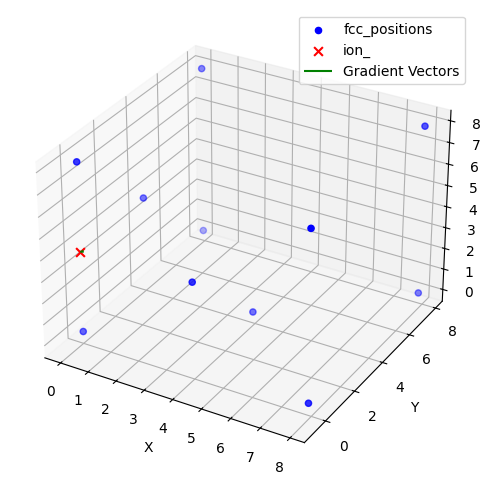

Epoch 53/100
Loss: 74.80032348632812 MeanGrad: [-4.356671  -5.619729  -0.7108723]


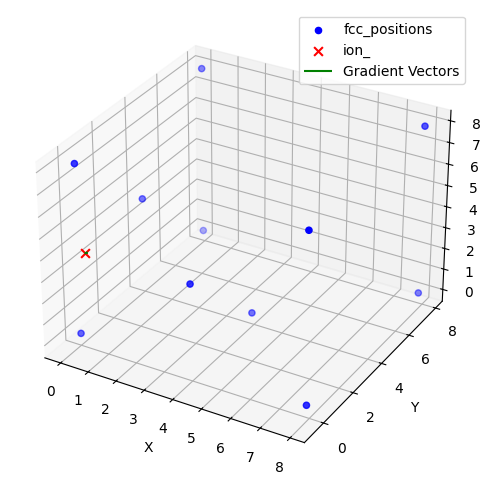

Epoch 54/100
Loss: 73.76604461669922 MeanGrad: [ 1.6512494 -4.5319033 -1.5013036]


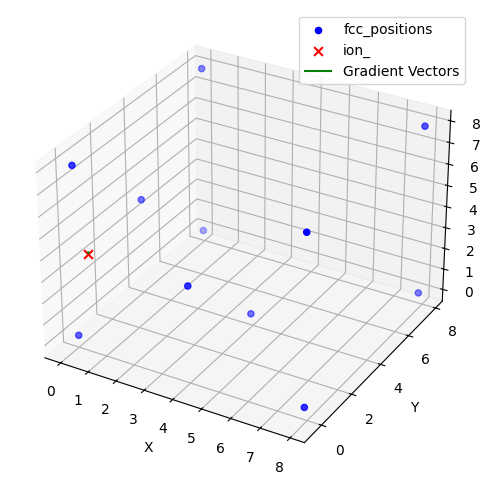

Epoch 55/100
Loss: 74.10133361816406 MeanGrad: [14.419256  -2.7217233 -3.113899 ]


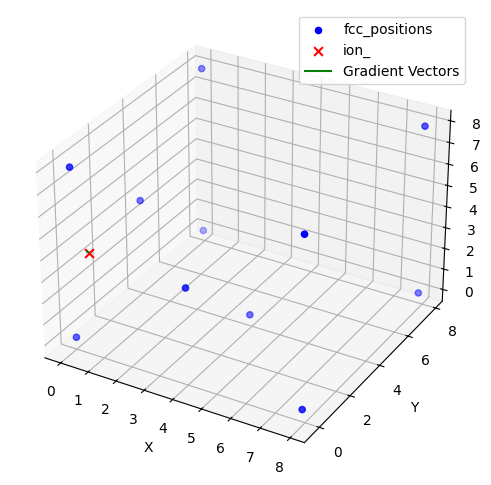

Epoch 56/100
Loss: 74.1142578125 MeanGrad: [19.743246  -2.687967  -2.4714339]


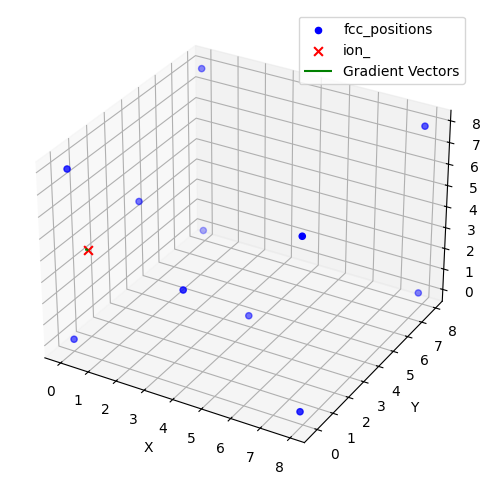

Epoch 57/100
Loss: 73.19317626953125 MeanGrad: [13.6773    -3.8887646  3.3540173]


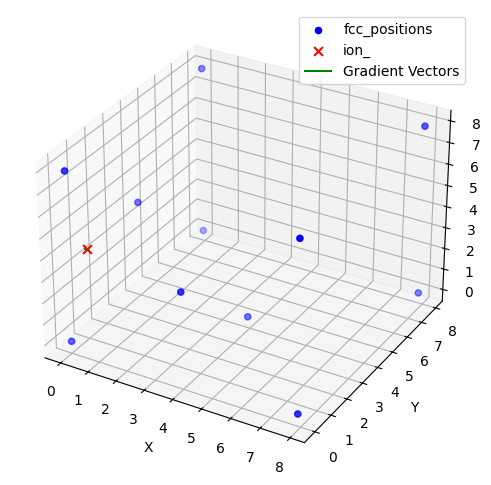

Epoch 58/100
Loss: 72.14143371582031 MeanGrad: [ 6.9608035 -5.312718   8.277816 ]


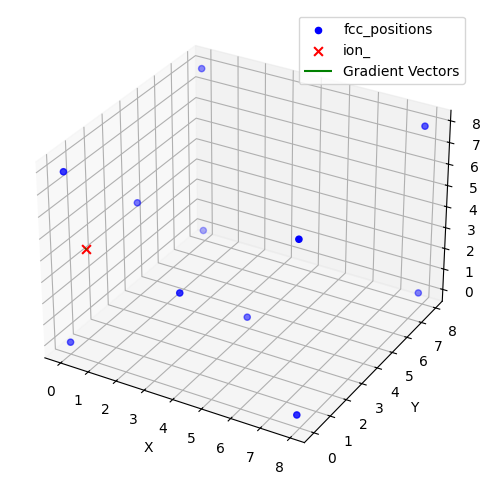

Epoch 59/100
Loss: 70.60603332519531 MeanGrad: [ 3.2384136 -6.479534   7.0172067]


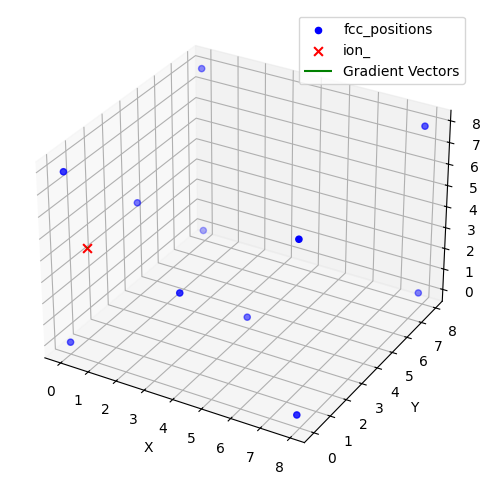

Epoch 60/100
Loss: 69.07947540283203 MeanGrad: [ 0.69758254 -6.7087436   3.731118  ]


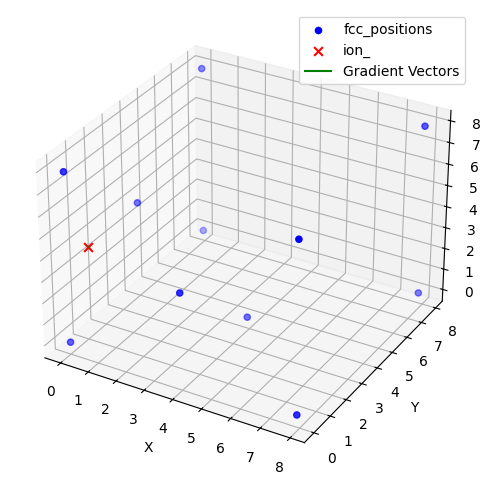

Epoch 61/100
Loss: 67.96378326416016 MeanGrad: [-1.4263574 -5.380236   0.9189541]


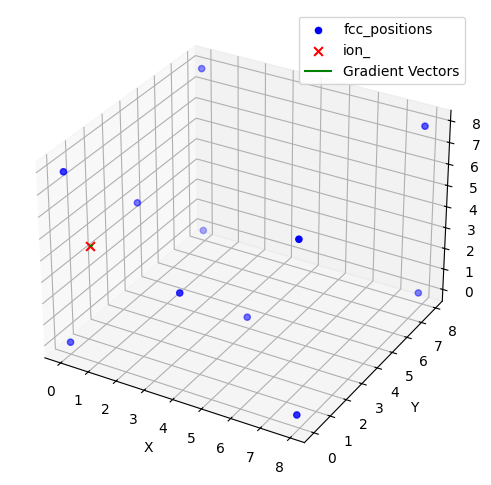

Epoch 62/100
Loss: 67.55349731445312 MeanGrad: [-3.4409711 -1.0284101 -0.92913  ]


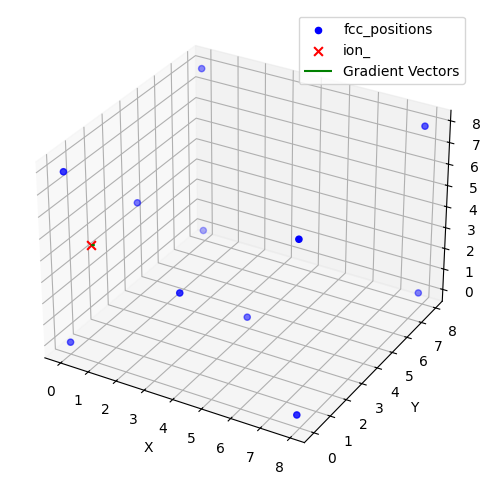

Epoch 63/100
Loss: 68.3030014038086 MeanGrad: [-5.621935  8.853196 -2.312225]


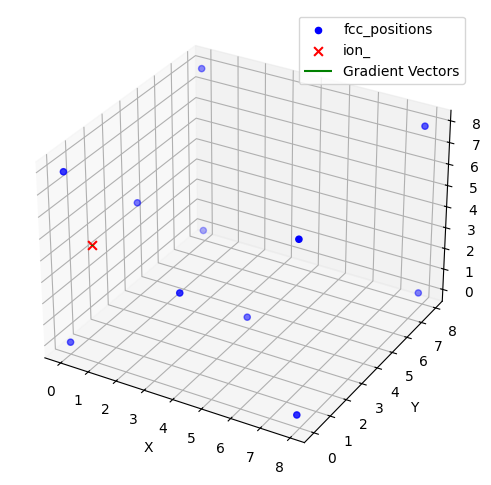

Epoch 64/100
Loss: 69.87248229980469 MeanGrad: [-7.54113   20.886356  -3.2509456]


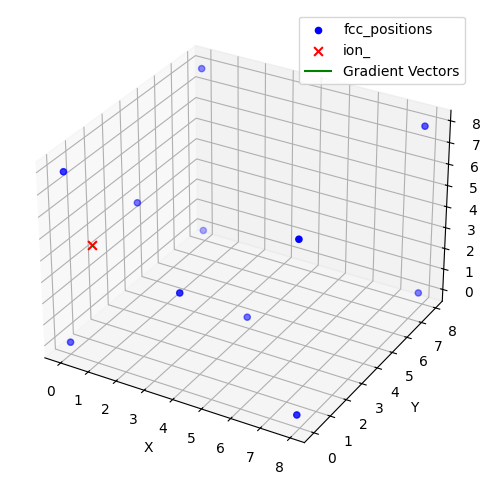

Epoch 65/100
Loss: 70.15373992919922 MeanGrad: [-7.7789383 22.66726   -3.1638818]


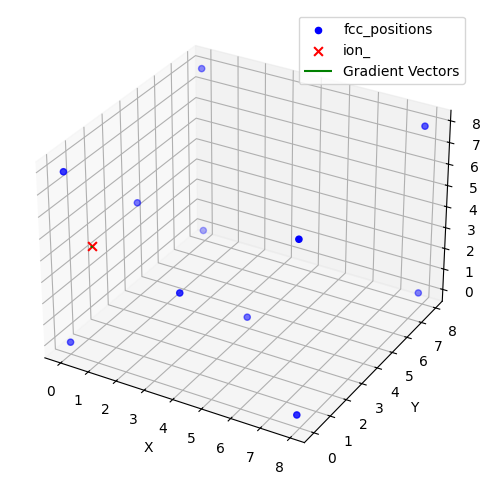

Epoch 66/100
Loss: 69.27201080322266 MeanGrad: [-6.72388   16.344463  -2.6086607]


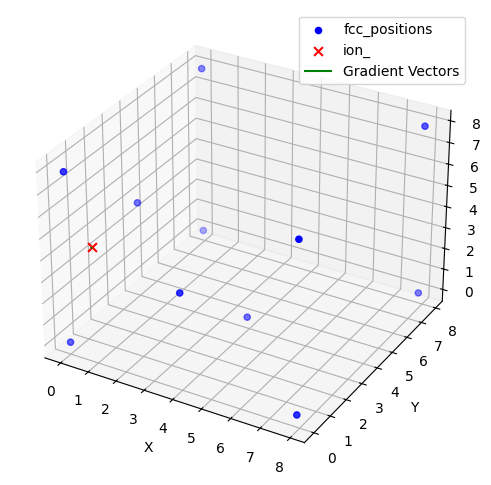

Epoch 67/100
Loss: 68.28670501708984 MeanGrad: [-5.0911283  8.499544  -2.079488 ]
Early stopping at epoch 67


In [46]:
ion_ =  ion.numpy()
fig = plt.figure(figsize=(4, 4))  # Adjust figure size if needed
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fcc_positions[:, 0], fcc_positions[:, 1], fcc_positions[:, 2], c='b', s=30, label='fcc_positions')
ax.scatter(ion_[:, 0], ion_[:, 1], ion_[:, 2], c='r', s=10, marker='x', label='ion_')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
# Custom training loop
eta0 = 0.1
batch_size = 256
epochs = 100
decay_rate = 0.20
optimizer = tf.keras.optimizers.Adam(learning_rate=eta0)
starting_pos =ion_.copy()

early_stopping = EarlyStoppingCallback(patience=5, min_delta=0.001)

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    eta = exp_decay_lr(eta0, decay_rate=decay_rate, epoch=epoch)
    #optimizer.learning_rate = eta
    for x_batch in tf.data.Dataset.from_tensor_slices(sample_atoms).shuffle(buffer_size=1024).batch(batch_size):

      with tf.GradientTape() as g:
        g.watch(ion)
        H_loss_ = H_loss(ion,x_batch)
      grad_ = g.gradient(H_loss_, ion)
      optimizer.apply_gradients(zip([grad_], [ion]))#El gradiente es muy peuqeño, quiza jugando con las unidades¿?
    print(f'Loss: {H_loss_.numpy()} MeanGrad: {tf.math.reduce_mean(grad_,axis=0).numpy()}')

    # Call the callback's on_epoch_end method
    if early_stopping.on_epoch_end(epoch, H_loss_.numpy()):
        print(f'Early stopping at epoch {early_stopping.stopped_epoch + 1}')
        break

    ion_ =  ion.numpy()
    gradN = -10*eta0*grad_.numpy()

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(fcc_positions[:, 0], fcc_positions[:, 1], fcc_positions[:, 2], c='b', s=20, label='fcc_positions')
    ax.scatter(ion_[:, 0], ion_[:, 1], ion_[:, 2], c='r', s=40, marker='x', label='ion_')

    # For quiver, we need to create a 3D representation of the gradient
    # Assuming gradN is a 2D array (num_ions, 2)
    gradN_3D = np.zeros(gradN.shape,dtype=gradN.dtype)  # Initialize with zeros for z-component
    gradN_3D = gradN  # Copy x and y components from gradN

    ax.quiver(ion_[:, 0], ion_[:, 1], ion_[:, 2], gradN_3D[:, 0], gradN_3D[:, 1], gradN_3D[:, 2],
              color='g', length=0.1, normalize=True, label='Gradient Vectors')  # Adjust length and normalize as needed

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    plt.show()

    if epoch+1==epochs:
      last_loss = H_loss_.numpy()
      system_energy = last_loss-(num_atoms*num_iones*Epsilon)

In [47]:
print(f'minima distancia para que no haya superposicion:{Sigma:.3f} A ',f'profundidad del pozo: {-Epsilon: .3f} j/mol')
print(f'Atomos en la muestra:{num_atoms}',f'Iones a adsorber:{num_iones}')
print(f'energía del sistema:{system_energy:.3f} j/mol',f'minima energía posible: {-Epsilon*num_atoms*num_iones:.3f} j/mol')
print(f'distance traveled: {ion_-starting_pos}')

minima distancia para que no haya superposicion:3.035 A  profundidad del pozo: -8.789 j/mol
Atomos en la muestra:11 Iones a adsorber:1
energía del sistema:-7.219 j/mol minima energía posible: -96.674 j/mol
distance traveled: [[ 2.4580898  3.5396092 -3.8769784]]
